In [3]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [4]:
from key import api_key

In [5]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [6]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [7]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [8]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [9]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [10]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [11]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [12]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [13]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [14]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

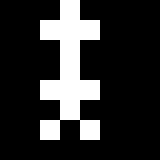

In [15]:

smiley_pattern = np.array([ 
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 1,1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0,0 ],
        [0, 0,0, 1, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]])
binary_array_to_png_and_display(smiley_pattern,scale_factor=20)

smiley_pattern_vec = feature_map(smiley_pattern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.0475594  0.86034795 0.56651299]
  [0.54397253 0.63862916 0.81471641]
  [0.91632483 0.65901724 0.5888883 ]
  [0.98237369 0.73549548 0.05354314]
  [0.69476678 0.0862226  0.75168681]
  [0.06502208 0.73681866 0.47884108]
  [0.50151944 0.71454363 0.18087868]
  [0.43580428 0.64650946 0.64161822]]

 [[0.42094253 0.28741622 0.83043361]
  [0.31697154 0.41026519 0.0897815 ]
  [0.80782988 0.52490336 0.3218558 ]
  [0.77277002 0.94476331 0.47607073]
  [0.36412748 0.26333406 0.43263675]
  [0.89945097 0.3211878  0.44047627]
  [0.45166978 0.4218036  0.51743684]
  [0.59902431 0.79671785 0.95536331]]

 [[0.58492261 0.7761554  0.84537585]
  [0.6502

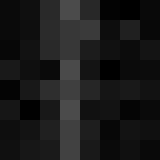

Current loss: 0.266254434399383


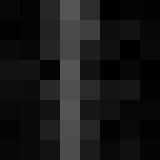

Current loss: 0.22601031971423713


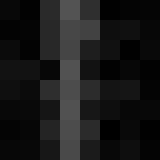

Current loss: 0.214304277397813


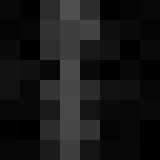

Current loss: 0.19580254165993127


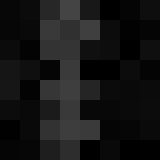

Current loss: 0.1767305984050962


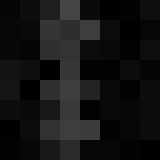

Current loss: 0.163206466966354


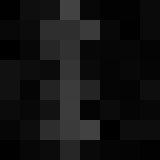

Current loss: 0.14684147140188986


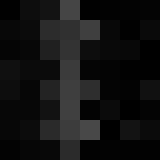

Current loss: 0.1338692599245691


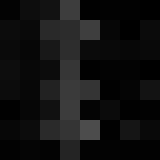

Current loss: 0.12327656488075289


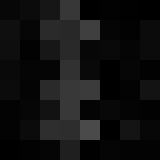

Current loss: 0.1087423331782329


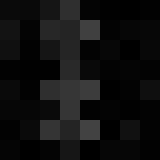

Current loss: 0.0911315593791513


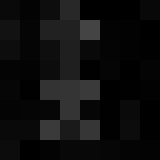

Current loss: 0.08137605934887804


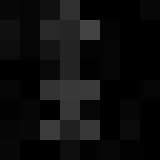

Current loss: 0.06932819316763006


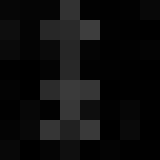

Current loss: 0.05480463961548454


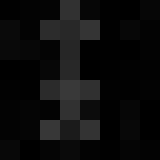

Current loss: 0.04188790551945787


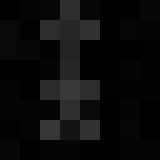

Current loss: 0.03563017105804067


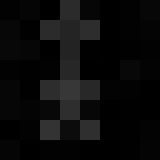

Current loss: 0.027688912202953553


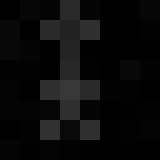

Current loss: 0.0232329333331307


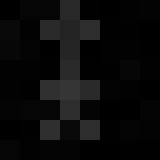

Current loss: 0.020095781055860518


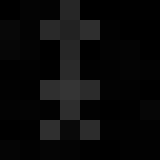

Current loss: 0.018101349349714302


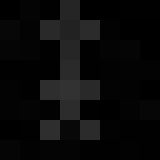

Current loss: 0.01657516117434965


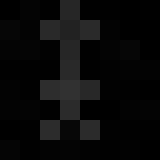

Current loss: 0.014794270324548942


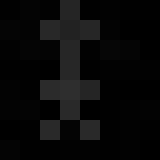

Current loss: 0.013051587212020155


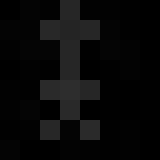

Current loss: 0.011764003653179422


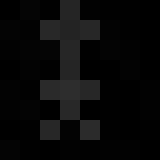

Current loss: 0.010682306295728639


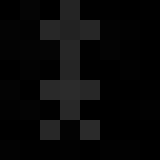

Current loss: 0.00961852691126086


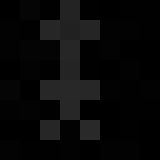

Current loss: 0.008414711088567395


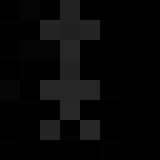

Current loss: 0.007456619425261102


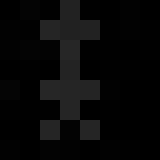

Current loss: 0.006873177587673696


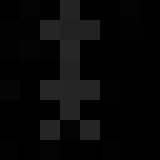

Current loss: 0.006335278454830284


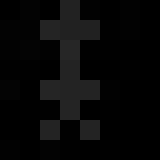

Current loss: 0.005692262567045581


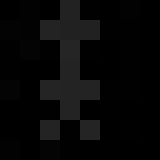

Current loss: 0.005148624081379838


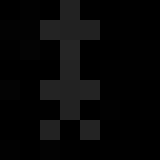

Current loss: 0.004648638206965816


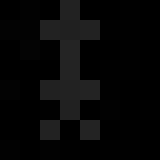

Current loss: 0.004168184758000959


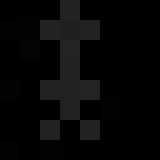

Current loss: 0.0038510418333511653


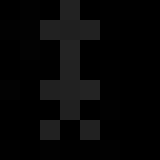

Current loss: 0.0034299186450825747


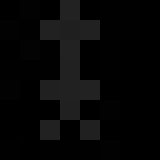

Current loss: 0.0031144172181540863


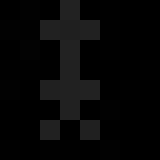

Current loss: 0.0028068096314064483


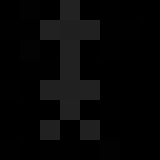

Current loss: 0.0025968799591509217


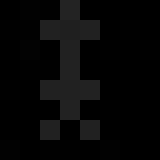

Current loss: 0.002420470723944246


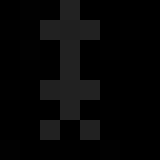

Current loss: 0.0022842748992734085


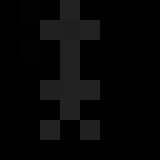

Current loss: 0.002144161608687245


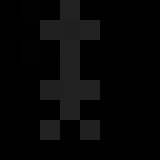

Current loss: 0.0020424644997506514


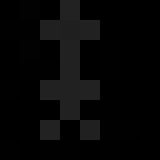

Current loss: 0.0019297756225258311


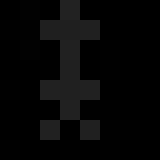

Current loss: 0.0018456235224624251


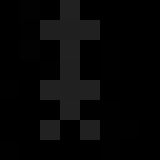

Current loss: 0.0017656106277099681


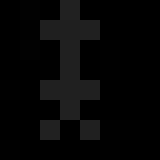

Current loss: 0.0016927067051302203


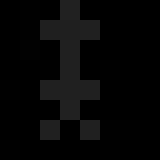

Current loss: 0.0016375382671581784


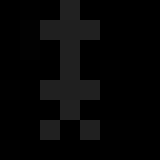

Current loss: 0.0015924244310612234


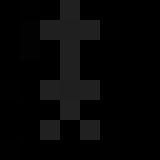

Current loss: 0.0015593980396702012


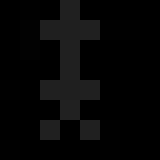

Current loss: 0.0015246055308496542


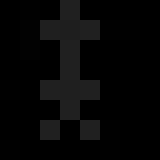

Current loss: 0.0014788297361281177


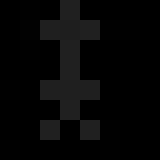

Current loss: 0.0014138402574244147


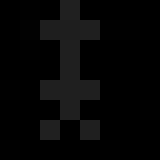

Current loss: 0.0013326243218796385


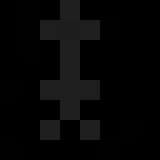

Current loss: 0.0012461438199889985


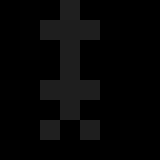

Current loss: 0.001183210577868521


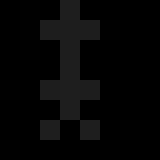

Current loss: 0.0011330328727578998


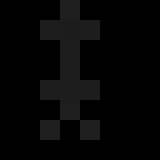

Current loss: 0.0010698912078760392


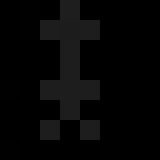

Current loss: 0.0009883686451180873


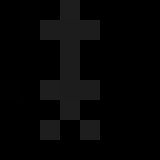

Current loss: 0.0009363387580798577


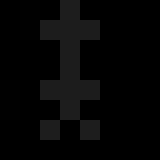

Current loss: 0.0008965788242401018


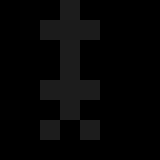

Current loss: 0.00085780611950248


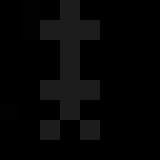

Current loss: 0.0008099276883859474


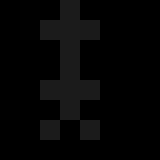

Current loss: 0.0007621605093025563


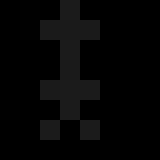

Current loss: 0.0007240040945929449


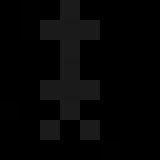

Current loss: 0.0006959929228020911


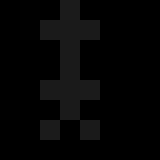

Current loss: 0.0006652581143209435


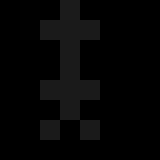

Current loss: 0.0006266187353249908


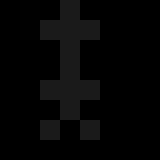

Current loss: 0.0005834222068233919


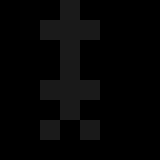

Current loss: 0.0005403912167917246


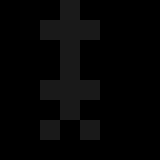

Current loss: 0.000493642345219536


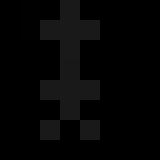

Current loss: 0.00045968891473080475


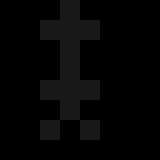

Current loss: 0.00044531646108969536


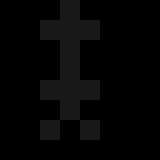

Current loss: 0.00042144823517653585


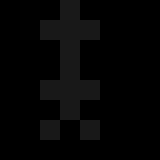

Current loss: 0.000389051979155286


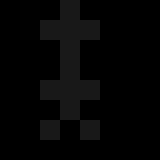

Current loss: 0.0003678550909972378


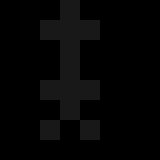

Current loss: 0.00034995416945793334


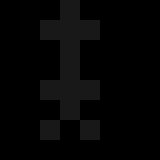

Current loss: 0.0003295392381260642


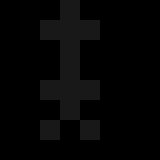

Current loss: 0.00030943448801379336


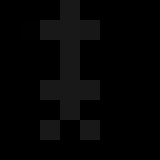

Current loss: 0.0002885559444081309


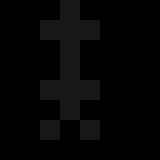

Current loss: 0.0002699507852212957


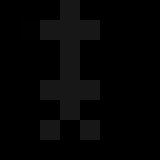

Current loss: 0.00025716470510361855


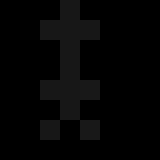

Current loss: 0.00025194863834310244


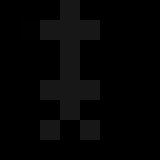

Current loss: 0.00024350809780748772


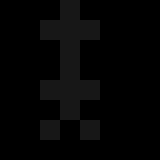

Current loss: 0.00023199779726179592


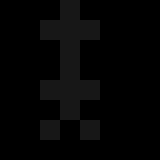

Current loss: 0.0002237240169670196


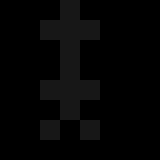

Current loss: 0.00021429215160206905


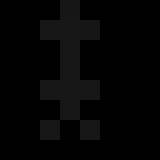

Current loss: 0.00020378692731981563


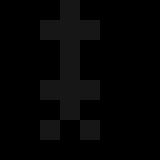

Current loss: 0.00019315755942950208


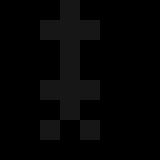

Current loss: 0.00018384862723808126


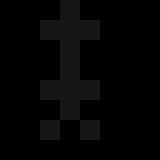

Current loss: 0.00017551443084184992


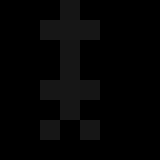

Current loss: 0.00016690115221462687


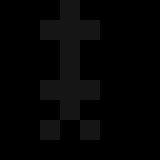

Current loss: 0.00015752022745429972


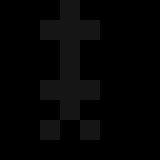

Current loss: 0.00014963695553382728


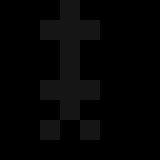

Current loss: 0.00014223236912158654


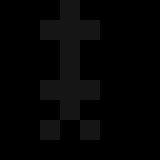

Current loss: 0.00013342334921517818


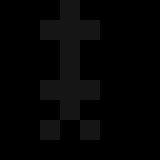

Current loss: 0.00012689393526588155


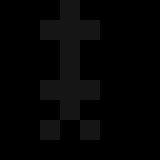

Current loss: 0.00012263757096175887


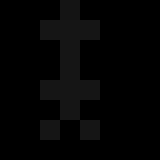

Current loss: 0.00011811747256373906


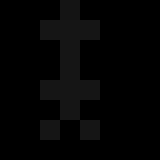

Current loss: 0.00011283992575461532


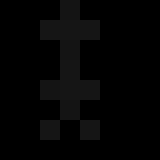

Current loss: 0.0001092639715569721


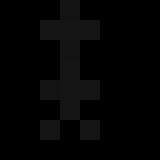

Current loss: 0.00010567250746362777


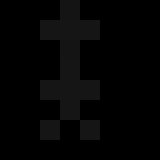

Current loss: 0.00010228704320036641


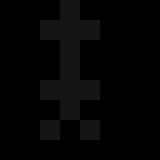

Current loss: 9.978437349766889e-05


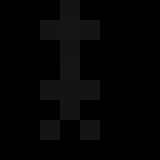

Current loss: 9.695929422992577e-05


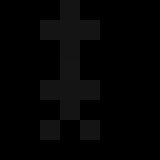

Current loss: 9.282611758343329e-05


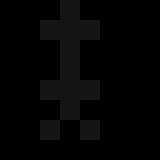

Current loss: 8.750162024206976e-05


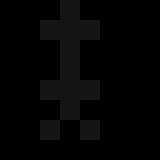

Current loss: 8.074034143057407e-05


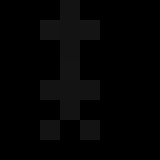

Current loss: 7.731308795200231e-05


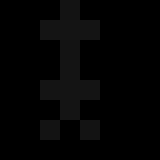

Current loss: 7.231683525854571e-05


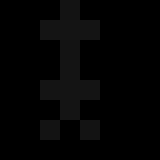

Current loss: 6.711587614449677e-05


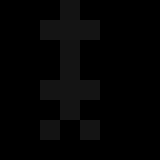

Current loss: 6.319742057703248e-05


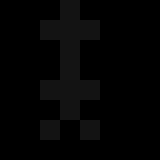

Current loss: 5.7372044289349944e-05


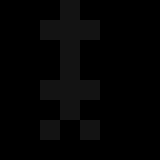

Current loss: 5.267231979755316e-05


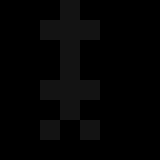

Current loss: 5.0538139750866407e-05


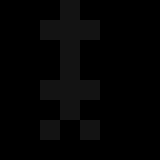

Current loss: 4.800680509109423e-05


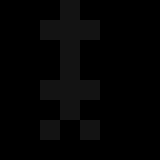

Current loss: 4.5821738319240524e-05


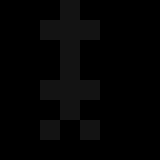

Current loss: 4.464574986029479e-05


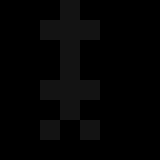

Current loss: 4.326540920551736e-05


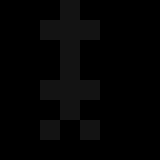

Current loss: 4.1754037614749606e-05


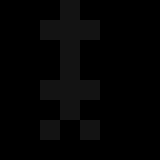

Current loss: 4.023390790808268e-05


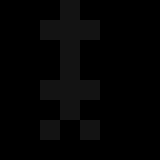

Current loss: 3.856425190551516e-05


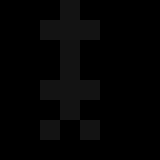

Current loss: 3.7368521469183236e-05


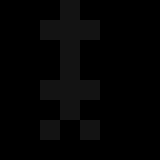

Current loss: 3.642993105767989e-05


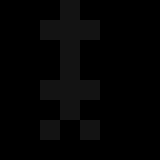

Current loss: 3.5464953268338206e-05


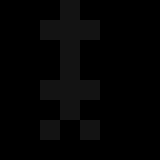

Current loss: 3.4404146492250653e-05


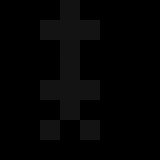

Current loss: 3.350295550696991e-05


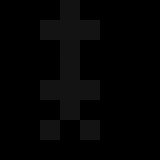

Current loss: 3.2332458316131074e-05


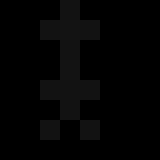

Current loss: 3.086007590880069e-05


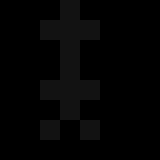

Current loss: 2.9485237066584347e-05


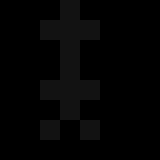

Current loss: 2.884943392134076e-05


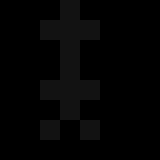

Current loss: 2.832256637930186e-05


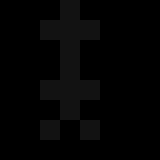

Current loss: 2.759892251058549e-05


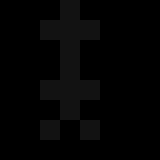

Current loss: 2.6916692989931157e-05


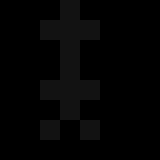

Current loss: 2.628694839723611e-05


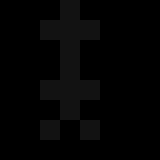

Current loss: 2.5491114342579557e-05


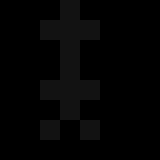

Current loss: 2.446709153625104e-05


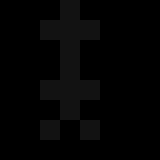

Current loss: 2.308780464488347e-05


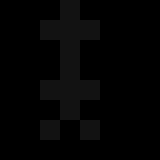

Current loss: 2.2069785973299894e-05


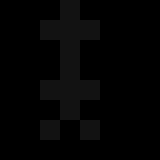

Current loss: 2.1458242074223755e-05


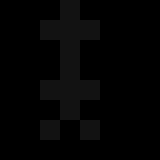

Current loss: 2.1068240992350162e-05


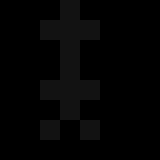

Current loss: 2.0775172422382582e-05


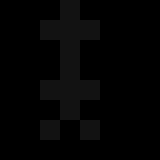

Current loss: 2.0372485182496014e-05


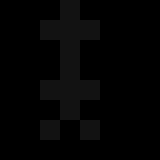

Current loss: 1.97443777083528e-05


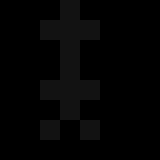

Current loss: 1.9027314496322667e-05


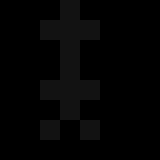

Current loss: 1.8544382671459303e-05


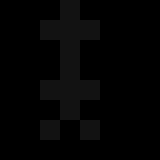

Current loss: 1.8022788142668666e-05


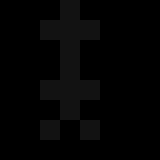

Current loss: 1.767094267379754e-05


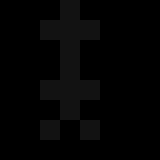

Current loss: 1.730384263287643e-05


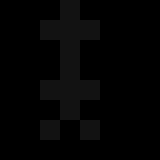

Current loss: 1.6842331878375028e-05


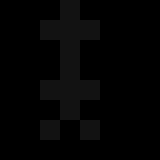

Current loss: 1.6214078702669887e-05


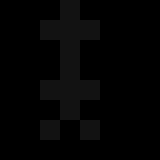

Current loss: 1.5529755657217592e-05


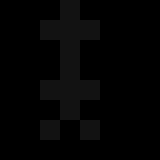

Current loss: 1.4852269070053659e-05


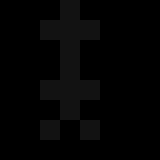

Current loss: 1.430749251896124e-05


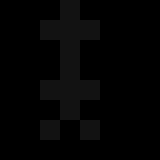

Current loss: 1.3723809907495443e-05


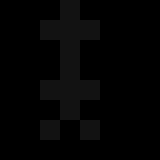

Current loss: 1.3201178497013188e-05


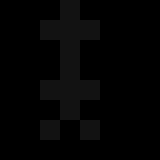

Current loss: 1.2961834688463014e-05


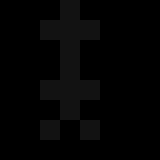

Current loss: 1.2823280190588093e-05


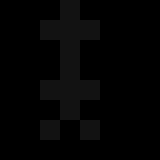

Current loss: 1.267834922569211e-05


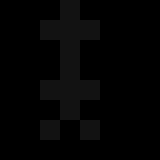

Current loss: 1.2473078268682158e-05


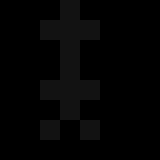

Current loss: 1.2160552122608692e-05


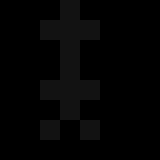

Current loss: 1.1667067269183207e-05


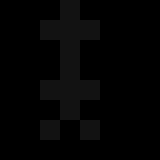

Current loss: 1.0926692024737505e-05


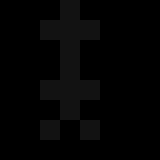

Current loss: 1.0117891937166945e-05


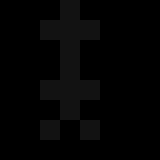

Current loss: 9.79746898688294e-06


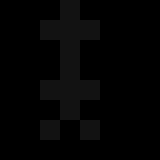

Current loss: 9.424505925559323e-06


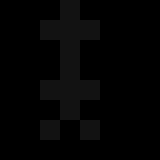

Current loss: 9.181528029977848e-06


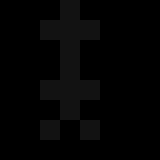

Current loss: 9.03703195775929e-06


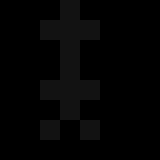

Current loss: 8.888501002890514e-06


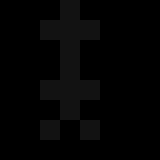

Current loss: 8.753790773585735e-06


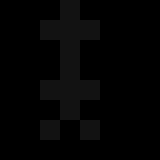

Current loss: 8.572223220482122e-06


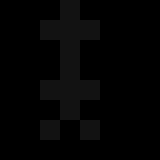

Current loss: 8.371192062317512e-06


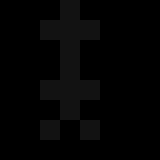

Current loss: 8.131328503080404e-06


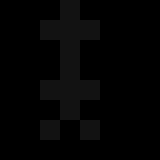

Current loss: 7.909568200958894e-06


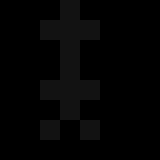

Current loss: 7.771636531872517e-06


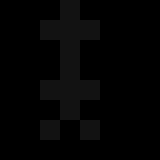

Current loss: 7.701471222087974e-06


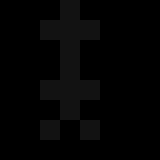

Current loss: 7.639327326169898e-06


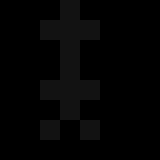

Current loss: 7.554382122298975e-06


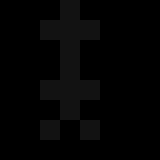

Current loss: 7.417516500685117e-06


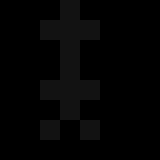

Current loss: 7.2021880536121685e-06


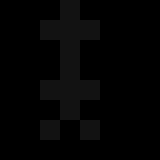

Current loss: 6.9097396395712e-06


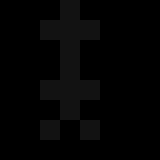

Current loss: 6.688658692799443e-06


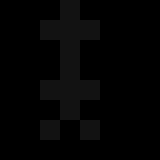

Current loss: 6.446504076107473e-06


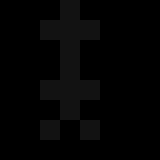

Current loss: 6.205555988958444e-06


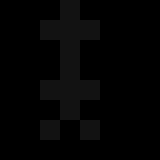

Current loss: 5.96712819656009e-06


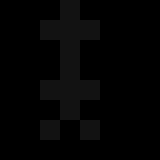

Current loss: 5.7582417918311535e-06


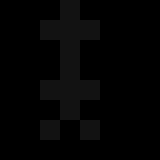

Current loss: 5.5428675541646655e-06


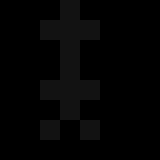

Current loss: 5.3229505651009035e-06


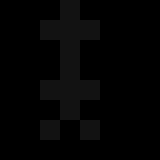

Current loss: 5.117293276235557e-06


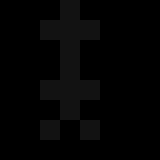

Current loss: 4.9013815661691496e-06


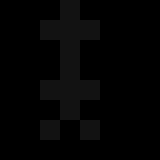

Current loss: 4.72764336734155e-06


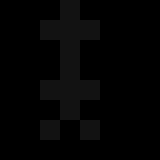

Current loss: 4.63192258304268e-06


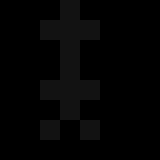

Current loss: 4.544408951701051e-06


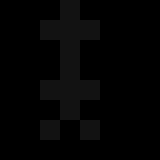

Current loss: 4.488986349526769e-06


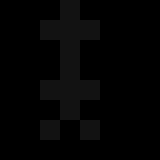

Current loss: 4.424737216179864e-06


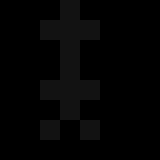

Current loss: 4.345771550728905e-06


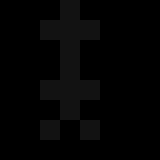

Current loss: 4.252940417726059e-06


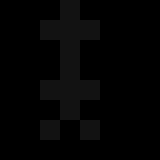

Current loss: 4.127115421304062e-06


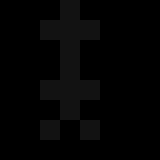

Current loss: 4.0396996205949165e-06


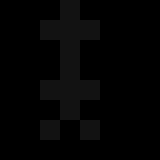

Current loss: 3.90004701322777e-06


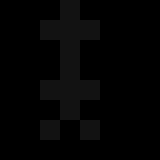

Current loss: 3.7073888419225653e-06


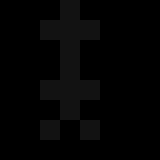

Current loss: 3.659379067988411e-06


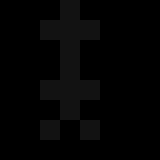

Current loss: 3.577674871024783e-06


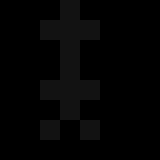

Current loss: 3.4604826649742293e-06


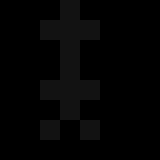

Current loss: 3.3855037603336413e-06


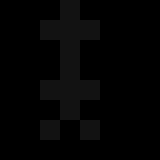

Current loss: 3.307839294808268e-06


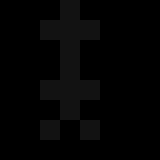

Current loss: 3.2597372716658413e-06


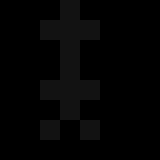

Current loss: 3.211917481871218e-06


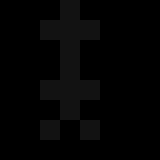

Current loss: 3.177122339881322e-06


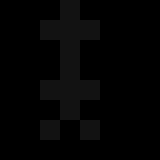

Current loss: 3.135646825414007e-06


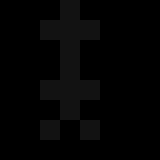

Current loss: 3.093569596601675e-06


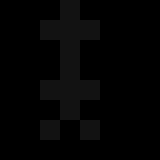

Current loss: 3.05278439893808e-06


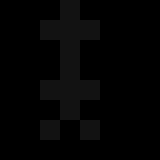

Current loss: 2.9876784723992245e-06


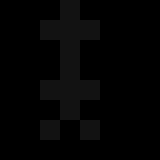

Current loss: 2.8856847937852592e-06


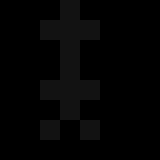

Current loss: 2.7411494458728924e-06


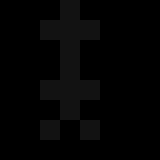

Current loss: 2.575689438177875e-06


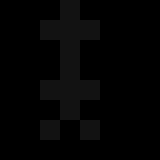

Current loss: 2.4145425001620424e-06


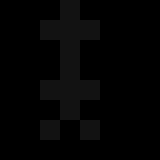

Current loss: 2.2995352022547877e-06


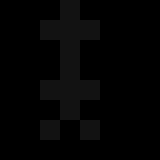

Current loss: 2.1574894530917987e-06


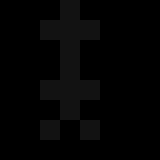

Current loss: 1.9550308463234245e-06


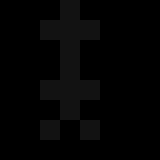

Current loss: 1.712155972333207e-06


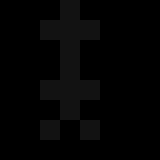

Current loss: 1.4695900749650548e-06


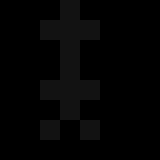

Current loss: 1.2469509484969166e-06


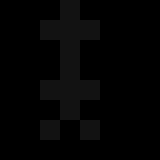

Current loss: 1.0856305986406412e-06


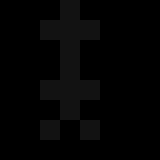

Current loss: 9.759531766073692e-07


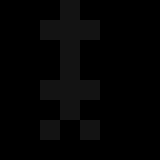

Current loss: 9.251370437501905e-07


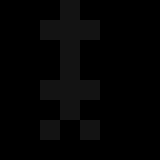

Current loss: 8.93249960332021e-07


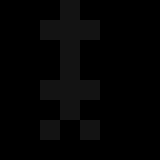

Current loss: 8.52070727197507e-07


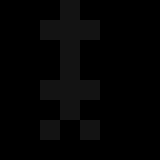

Current loss: 8.25562939565927e-07


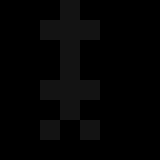

Current loss: 8.111383640319048e-07


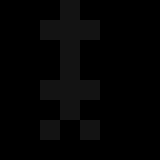

Current loss: 7.961753313301401e-07


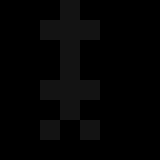

Current loss: 7.873634207955504e-07


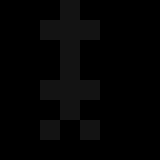

Current loss: 7.813790020572142e-07


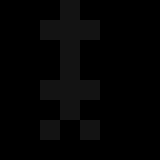

Current loss: 7.774861989773285e-07


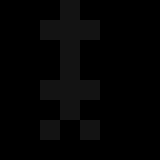

Current loss: 7.741732858113082e-07


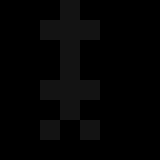

Current loss: 7.717937144935405e-07


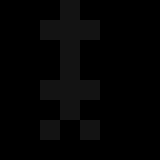

Current loss: 7.701080069200117e-07


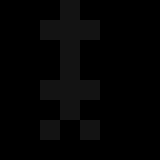

Current loss: 7.67321749584049e-07


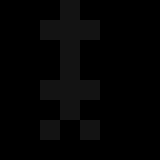

Current loss: 7.629901572769882e-07


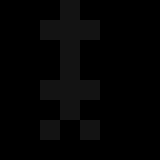

Current loss: 7.578410170516747e-07


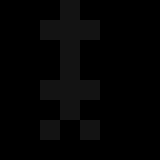

Current loss: 7.534535507724982e-07


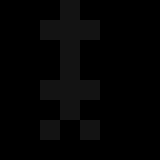

Current loss: 7.461356790194884e-07


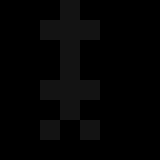

Current loss: 7.34015637604557e-07


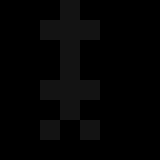

Current loss: 7.149852923049593e-07


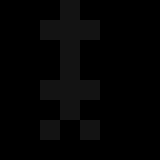

Current loss: 6.867324606751879e-07


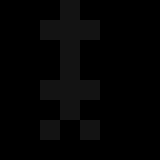

Current loss: 6.512901148392203e-07


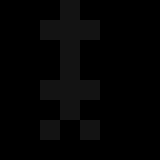

Current loss: 6.075094327595565e-07


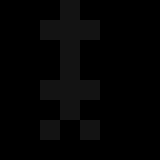

Current loss: 5.765449689887348e-07


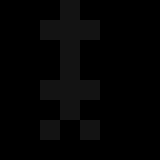

Current loss: 5.361774373380257e-07


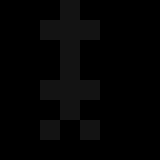

Current loss: 5.161058531655272e-07


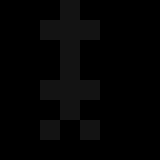

Current loss: 5.062062886640462e-07


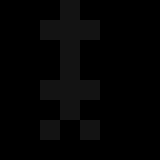

Current loss: 4.974139943270117e-07


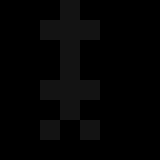

Current loss: 4.907423144517864e-07


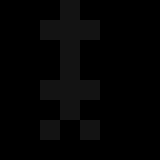

Current loss: 4.866370524325703e-07


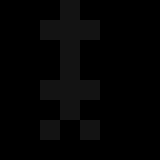

Current loss: 4.824242967327308e-07


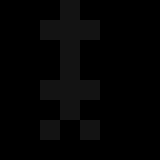

Current loss: 4.770721668823086e-07


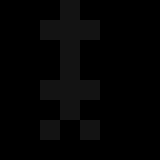

Current loss: 4.70696625787248e-07


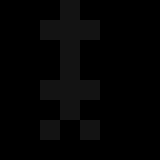

Current loss: 4.6189451419209604e-07


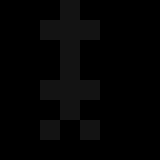

Current loss: 4.5433792772442416e-07


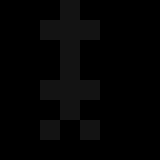

Current loss: 4.499670277491319e-07


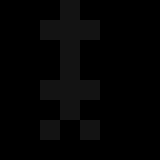

Current loss: 4.453435163975783e-07


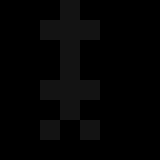

Current loss: 4.417502976750143e-07


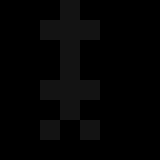

Current loss: 4.3719123687946393e-07


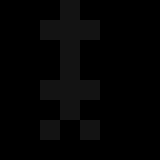

Current loss: 4.3527114790276045e-07


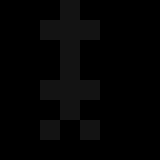

Current loss: 4.3344704370174014e-07


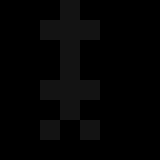

Current loss: 4.3200834021206447e-07


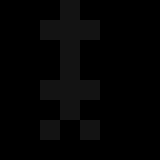

Current loss: 4.2988863679926936e-07


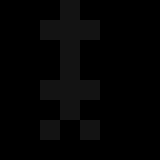

Current loss: 4.269827184044672e-07


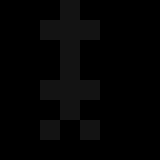

Current loss: 4.2341944206381044e-07


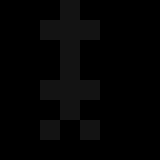

Current loss: 4.199494131329473e-07


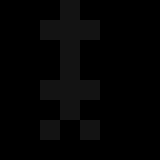

Current loss: 4.177027770335684e-07


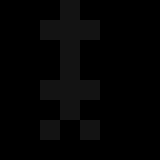

Current loss: 4.1631838920697106e-07


In [16]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1-score

def callback(params):
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    print("Current loss:", objective(params))
    
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [17]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

Optimized Parameters: [ 4.75459483e-02  1.12681264e+00  4.65670206e-01  5.43975429e-01
  7.87552432e-01  1.00681247e-01  9.16324732e-01  7.13543967e-01
  9.85406594e-01  9.82370561e-01  1.01139277e+00  1.53931200e-01
  6.94765310e-01  8.54222623e-01  1.34197888e+00  6.50339136e-02
  5.28549071e-01 -1.47752683e-01  5.01503646e-01  3.15492332e-03
  6.84049810e-01  4.35803149e-01  4.31747050e-01 -1.26293671e-01
  5.70910522e-01  1.98454683e-01  2.86635668e-01  4.43695831e-01
  7.01509214e-01  1.86632369e-01  8.36140425e-01  7.77135021e-02
  5.87364960e-01 -1.34263297e-01  1.23789116e+00 -5.74863723e-01
  7.50601378e-01 -4.37660341e-01  9.47980639e-01  8.54305162e-01
 -1.16410399e-04 -2.96067573e-01 -2.86627948e-01  4.39544796e-01
  1.02369410e+00  9.20196276e-01  2.52183166e-02  1.82586832e+00
  9.58352896e-01  6.63167386e-02  8.88674465e-01  6.23999180e-01
 -1.04827328e-02  1.68084919e-01  3.46545690e-01  1.00903440e-02
 -3.36138817e-01  2.49521550e-01 -1.48614593e-03  2.33656253e-02
  5

In [18]:
res = circuit(weights_p1,0)
# print(res)

In [19]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)


TypeError: only integer scalar arrays can be converted to a scalar index